In [1]:
from pymisca.util import *
from pymisca.vis_util import *
import IPython.display as ipd

import KBs
import random
random.seed(100)
outlst = []


is in ipython: 1
[WARN] pymisca.vis_util cannot find network


In [2]:
import workers
worker = workers.worker0323
kb = KBs.kb_2dntca()

it = kb.bulk_rstr(seed=100,bsize=100)
out = mp_map(worker,it,n_cpu=12)
outlst.extend(out)
print 'finished'

finished


In [3]:
tst_dct = [{'family':'2dntca','rulestr':x[1]} for x in KBs.tst_data]
tst_out = mp_map(worker,tst_dct,n_cpu=12)
print 'finished'

finished


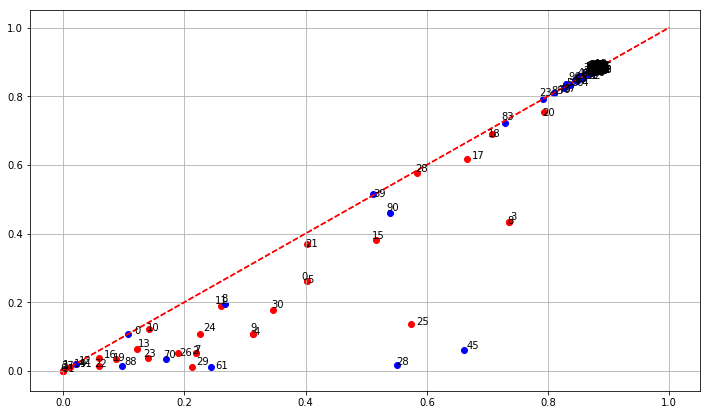

In [4]:
plt.figure(figsize=(12,7))
dt  = map(lambda x:x.get('data').get('med'),tst_out)
xs,ys = zip(*dt)
plt.scatter(*zip(*dt),color='red')
for i,(x,y) in enumerate(dt):
    x = x+(np.random.random()-0.5)/50.
    y = y+(np.random.random()-0.5)/50.
    plt.text(x,y,i )
plt.plot([0,1],[0,1],'r--')

dt  = map(lambda x:x.get('data').get('med'),out)
xs,ys = zip(*dt)
plt.scatter(*zip(*dt),color='blue')
for i,(x,y) in enumerate(dt):
    x = x+(np.random.random()-0.5)/50.
    y = y+(np.random.random()-0.5)/50.
    plt.text(x,y,i)
plt.plot([0,1],[0,1],'r--')

plt.grid()
plt.show()

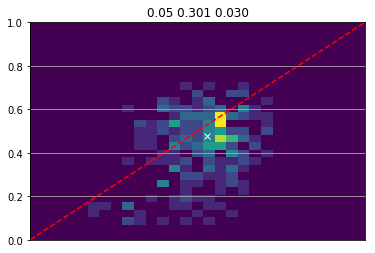

http://newflaw.com/view.php?rule_alias=b3acknqry2aekn5aijnqy4aeiknqtwyz7ce6cek8s3ceiknq2ac5ery4aceijkqrwz7ce6aik8


'http://newflaw.com/view.php?rule_alias=b3acknqry2aekn5aijnqy4aeiknqtwyz7ce6cek8s3ceiknq2ac5ery4aceijkqrwz7ce6aik8'

In [10]:
i=90
test = workers.test0323
test(dct=it[i])
plt.show()
KBs.lview(guess(dct=it[i]))

In [7]:
%%time
##### archive scripts
from KBs import *
import scipy.spatial.distance as spdist
def worker0323(dct):
    sysX = guess(dct=dct)
    hist = sample(sysX)
    hist = hist.reshape(hist.shape[:2]+(-1,))

    d = spdist.pdist(hist[-1],'hamming')
    d = 1 - abs(2*d-1)
    D = spdist.squareform(d)
    np.fill_diagonal(D,2)
    
    d = spdist.pdist(hist[len(hist)//2],'hamming')
    d = 1 - abs(2*d-1)
    D1= spdist.squareform(d)
    np.fill_diagonal(D1,2)
    
    MIN = D.min(axis=0)
    MIN1 = D1.min(axis=0)
    data = np.vstack([MIN1,MIN]).T
    
    MEDS = [np.median(MIN1),np.median(MIN)]
    COV = np.cov(data.T)
    COR = cov2cor(COV)
    return {'rule':{'family':sysX.familyname,'rulestr':sysX.rulestr},
            'data':{ 'med':[x.tolist() for x in MEDS],'cov':COV.ravel().tolist(),'cor':[COR[0,1]]},
           }
worker=worker0323


CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 31 µs


In [ ]:
def test0323(**kwargs):
    sysX = guess(**kwargs)
    hist = sample(sysX)
    hist = hist.reshape(hist.shape[:2]+(-1,))
    d = spdist.pdist(hist[-1],'hamming')
    d = 1 - abs(2*d-1)
    D = spdist.squareform(d)
    np.fill_diagonal(D,2)
    d = spdist.pdist(hist[len(hist)//2],'hamming')
    d = 1 - abs(2*d-1)
    D1= spdist.squareform(d)
    # plt.imshow(D[:50,:50])
#     plt.hist(D.ravel())
#     plt.hist(d.ravel(),bins=np.linspace(0,1,20))
    MIN = D.min(axis=0)
    MED = np.median(D,axis=0)
    MEAN = np.mean(D,axis=0)
    BINS=np.linspace(0,1,30)
    np.fill_diagonal(D,0)

#     plt.hist(MIN,bins=np.linspace(0,1,20))
#     plt.plot(MIN,MED,'x')

#     plt.hist2d(STD,MED,bins=BINS,norm=None
#     plt.hist2d(MIN,MED,bins=BINS,norm=None
#               )
#     plt.hist2d(D1.ravel(),D.ravel(),bins=BINS,norm=None
#               )
    np.fill_diagonal(D1,2)
    MIN1 = D1.min(axis=0)
    MEDS = [np.median(MIN1),np.median(MIN)]
    plt.hist2d(MIN1,MIN,bins=BINS,norm=None,normed=1
              )
    plt.plot([0,1],[0,1],'r--')
    data = np.vstack([MIN1,MIN]).T
#     res = gaussfit(data)
#     plt.plot(*(res.means_.ravel().tolist()+['rx']))
    plt.plot(*(MEDS+['wx']))
#     COV = res.covariances_[0]
    COV = np.cov(data.T)
    COR = cov2cor(COV)
#     logp = res.score_samples(data)
    plt.title('%.2f %.3f %.3f'%(
#         res.bic(data),
        abs(np.diff(MEDS)),
        COR[0,1],
#         np.std(logp)/np.mean(logp),
        np.trace(COV),
#                            np.prod(np.diag(np.sqrt(COV) ))
                          ) )
    plt.xticks([], [])
#                mpl.colors.LogNorm()
#     plt.hist2d(MEAN,MED,bins=BINS)
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.grid()
    return D

    return {'rule':{'family':sysX.family,'rulestr':sysX.rulestr},
            'med':np.ravel(MEDS).tolist(),'cov':COV.ravel().tolist(),'cor':COR[0,1]}
#     plt.show()
    
test = test0323